# The Fashion MNIST dataset

**Our goal is to build an image classifier with ``Keras`` and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Importing and Visualizing the data

In [1]:
import warnings
warnings.filterwarnings(action="ignore")

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
single_image = x_train[np.random.randint(0, len(x_train))]

print(single_image.shape)

(28, 28)


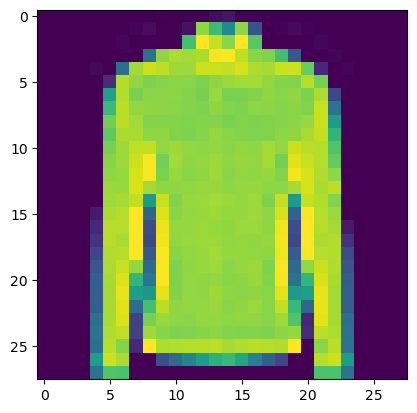

In [6]:
_ = plt.imshow(single_image)

In [7]:
print(single_image.min(), single_image.max())

0 255


In [8]:
print(y_train) # labels

[9 0 0 ... 3 0 5]


# Data Preprocessing

Normalize the ``x_train`` and ``x_test`` data by dividing by the max value of the image arrays.

In [9]:
x_train = x_train / 255
x_test = x_test / 255

print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0.0 1.0
0.0 1.0


Reshape the X arrays to include a 4 dimension of the single colour channel.

In [10]:
x_train = x_train.reshape(60_000, 28, 28, 1)
x_test = x_test.reshape(10_000, 28, 28, 1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Convert the ``y_train`` and ``y_test`` values to be one-hot encoded for categorical analysis by ``Keras``.

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

print(y_cat_train.shape)
print(y_cat_test.shape)

(60000, 10)
(10000, 10)


# Build a Convolutional Neural Network

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [14]:
model = Sequential()

model.add(
    Conv2D(
        filters=32,
        kernel_size=(4,4),
        input_shape=(28,28,1),
        activation="relu"
    )
)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor="val_loss", patience=2, verbose=1)

In [18]:
model.fit(x_train, 
          y_cat_train, 
          validation_data=(x_test, y_cat_test),
          batch_size=32,
          epochs=50,
          callbacks=[early_stop]
)

Epoch 1/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4054 - accuracy: 0.8547 - val_loss: 0.3229 - val_accuracy: 0.8837
Epoch 2/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2788 - accuracy: 0.8972 - val_loss: 0.2829 - val_accuracy: 0.8953
Epoch 3/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2318 - accuracy: 0.9147 - val_loss: 0.2896 - val_accuracy: 0.8924
Epoch 4/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2015 - accuracy: 0.9249 - val_loss: 0.2531 - val_accuracy: 0.9061
Epoch 5/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1725 - accuracy: 0.9359 - val_loss: 0.2630 - val_accuracy: 0.9103
Epoch 6/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1494 - accuracy: 0.9442 - val_loss: 0.2767 - val_accuracy: 0.9109
Epoch 6: early stopping


# Evaluating the Model

In [19]:
metrics = pd.DataFrame(model.history.history)

print(metrics.columns)

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')


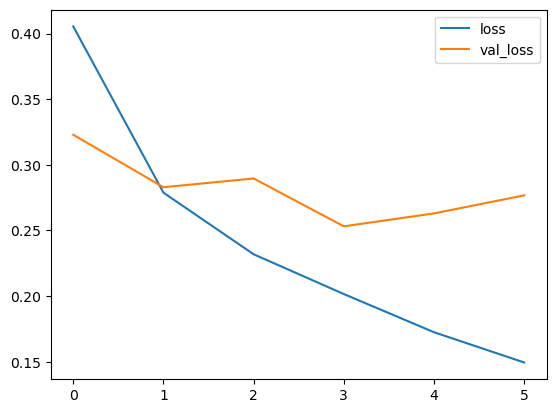

In [20]:
_ = metrics[["loss", "val_loss"]].plot()

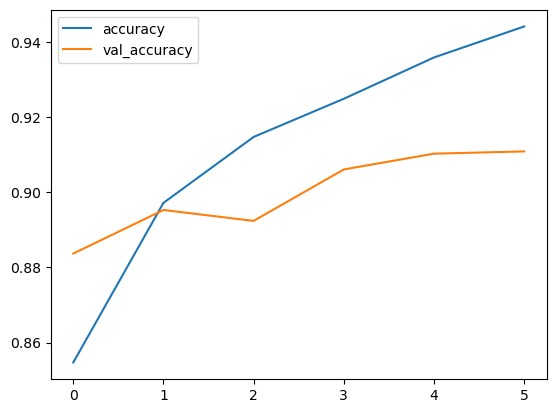

In [21]:
_ = metrics[["accuracy", "val_accuracy"]].plot()

In [22]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.2767133116722107, 0.9108999967575073]

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
y_pred_prob = model.predict(x_test)

y_pred_prob

313/313 [==============================] - 1s 4ms/step


array([[3.2852159e-07, 2.0594108e-07, 1.2167844e-06, ..., 6.6540355e-04,
        7.3942886e-07, 9.9932116e-01],
       [5.9458425e-06, 2.1480278e-16, 9.9998993e-01, ..., 1.5376143e-12,
        7.8127019e-12, 2.0906269e-12],
       [1.4844566e-10, 9.9999994e-01, 5.7946773e-13, ..., 2.6836846e-14,
        8.2185377e-14, 1.6078129e-18],
       ...,
       [1.1085485e-06, 2.5189657e-12, 5.6719807e-07, ..., 9.5617914e-09,
        9.9999768e-01, 3.5578407e-10],
       [8.4104959e-11, 9.9999994e-01, 1.8008286e-12, ..., 3.4389806e-13,
        8.2209989e-14, 3.9574779e-14],
       [2.3836105e-03, 2.7388078e-05, 2.0701722e-03, ..., 3.1819344e-01,
        4.7928017e-02, 5.8064726e-03]], dtype=float32)

In [25]:
predictions = np.argmax(y_pred_prob, axis=1)

predictions

array([9, 2, 1, ..., 8, 1, 5])

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.90      0.83      0.86      1000
           3       0.89      0.95      0.92      1000
           4       0.86      0.88      0.87      1000
           5       0.99      0.96      0.98      1000
           6       0.79      0.68      0.73      1000
           7       0.93      0.99      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [27]:
print(confusion_matrix(y_test, predictions))

[[916   0   6  19   3   0  50   0   6   0]
 [  4 975   0  13   5   0   2   0   1   0]
 [ 27   0 832  16  59   0  66   0   0   0]
 [ 13   3   6 948  16   0  12   0   2   0]
 [  2   0  41  28 875   0  52   0   2   0]
 [  0   0   0   0   0 961   0  26   2  11]
 [167   0  44  36  60   0 684   0   9   0]
 [  0   0   0   0   0   2   0 988   1   9]
 [  3   0   0   6   1   2   2   3 983   0]
 [  1   0   0   0   0   4   0  48   0 947]]


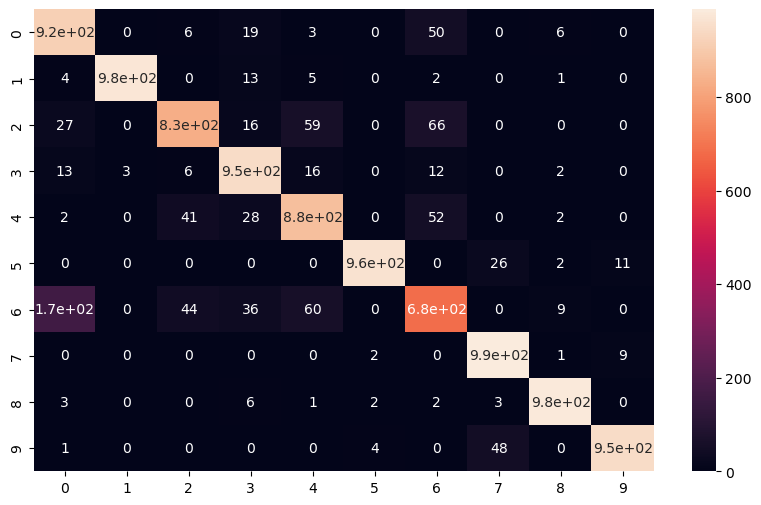

In [28]:
plt.figure(figsize=(10,6))

_ = sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

# Predicting on a new image

In [29]:
rnd_idx = np.random.randint(0, len(x_test))
my_image = x_test[rnd_idx]

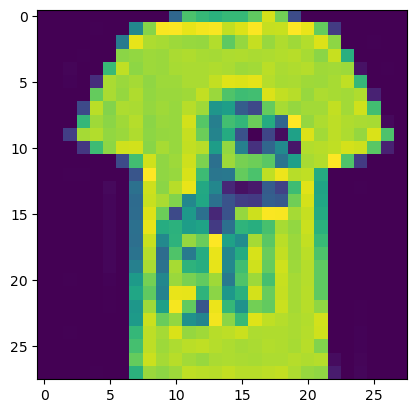

In [30]:
_ = plt.imshow(my_image.reshape(28,28))

In [31]:
print(my_image.shape)

(28, 28, 1)


In [32]:
my_image_pred = np.argmax(model.predict(my_image.reshape(1,28,28,1)), axis=1)

1/1 [==============================] - 0s 17ms/step


In [33]:
print(f"Predicted class: {my_image_pred}\nActual class: {y_test[rnd_idx]}")

Predicted class: [0]
Actual class: 0
